In [1]:
#install geemap and leafmap

In [2]:
! pipenv install geemap leafmap

Installing geemap...
Resolving geemap...
Added geemap to Pipfile's [packages] ...
✔ Installation Succeeded...
⠋ Installing geemap...
Installing leafmap...
Resolving leafmap...
✔ Installation Succeeded
⠋ Installing leafmap...
Pipfile.lock (934e2d) out of date, updating to (8eeff4)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠇ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (ec76f5743dcc008fbf126977a1b617eb77f3c33f70aed784ab58a45cf28eeff4)!
Installing dependencies from Pipfile.lock (8eeff4)...


In [6]:
#test
import leafmap
m=leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [1]:
! pipenv install geopandas


Installing geopandas...
Resolving geopandas...
Added geopandas to Pipfile's [packages] ...
✔ Installation Succeededdas...
⠋ Installing geopandas...
Pipfile.lock (8eeff4) out of date, updating to (67730f)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✘ Locking Failed!g...
⠹ Locking...False
[ResolutionFailure]:   File "/home/joshua/.local/lib/python3.10/site-packages/pipenv/resolver.py", line 645, in _main
[ResolutionFailure]:       resolve_packages(
[ResolutionFailure]:   File "/home/joshua/.local/lib/python3.10/site-packages/pipenv/resolver.py", line 612, in resolve_packages
[ResolutionFailure]:       results, resolver = resolve(
[ResolutionFailure]:   File "/home/joshua/.local/lib/python3.10/site-packages/pipenv/resolver.py", line 592, in resolve
[ResolutionFailure]:       return resolve_deps(
[ResolutionFailure]:   File "/home/joshua/.local/lib/python3.10/site-packages/pipenv/utils/resolver.py", line 918, in resolve_deps
[ResolutionFailure]:

In [5]:
! pip install geopandas


In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [23]:
#creating a geodataframe
import pandas as pd
data={
    "City": ["Tokyo","New York","London","Paris"],
    "Latitude": [35.6895, 40.7128, 51.5074, 48.8566],
    "Longitude": [139.6917, -74.0060, -0.1278, 2.3522],
}

df=pd.DataFrame(data)

gdf=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,City,Latitude,Longitude,geometry
0,Tokyo,35.6895,139.6917,POINT (139.6917 35.6895)
1,New York,40.7128,-74.0060,POINT (-74.006 40.7128)
2,London,51.5074,-0.1278,POINT (-0.1278 51.5074)
3,Paris,48.8566,2.3522,POINT (2.3522 48.8566)


In [ ]:
! pipenv install geodatasets


Installing geodatasets...
Resolving geodatasets...
Added geodatasets to Pipfile's [packages] ...
✔ Installation Succeededasets...
⠋ Installing geodatasets...
Pipfile.lock (8eeff4) out of date, updating to (aaa1cf)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
⠏ Locking...

In [21]:
#reading a shapefile
import geodatasets
try:
    world=gpd.read_file(geodatasets.get_path("naturalearth land"))
    print(world.head())
except Exception as e:
    print(f"An error occured: {e}")
#writting the geodataframe to a geojson file
output_file="world.geojson"
try:
    world.to_file(output_file, driver="GeoJSON")
    print(f"GeoDataframe has been witten to {output_file}")
except Exception as e:
    print(f"an error occured while writing to  : {output_file}:{e}")

  featurecla  scalerank  min_zoom  \
0       Land          1       1.0   
1       Land          1       1.0   
2       Land          1       0.0   
3       Land          1       1.0   
4       Land          1       1.0   

                                            geometry  
0  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...  
1  POLYGON ((-159.20818 -79.49706, -161.1276 -79....  
2  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...  
3  POLYGON ((-121.21151 -73.50099, -119.91885 -73...  
4  POLYGON ((-125.55957 -73.48135, -124.03188 -73...  
GeoDataframe has been witten to world.geojson


SPATIAL OPERATIONS

In [24]:
#example of buffering
gdf["buffer"] = gdf.buffer(1) #buffer of 1 degree
gdf[["City", "buffer"]]

,City,buffer
0,Tokyo,"POLYGON ((140.6917 35.6895, 140.68688 35.59148..."
1,New York,"POLYGON ((-73.006 40.7128, -73.01082 40.61478,..."
2,London,"POLYGON ((0.8722 51.5074, 0.86738 51.40938, 0...."
3,Paris,"POLYGON ((3.3522 48.8566, 3.34738 48.75858, 3...."


In [25]:
#examples of spatial join

paris=gdf[gdf["City"] =="Paris"]
polygon=Polygon([(2, 48), (2.5, 48), (2.5, 49), (2, 49)])
polygon_gdf=gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf.crs)
joined=gpd.sjoin(gdf, polygon_gdf, predicate="within")
joined

,City,Latitude,Longitude,geometry,buffer,index_right,0
3,Paris,48.8566,2.3522,POINT (2.3522 48.8566),"POLYGON ((3.3522 48.8566, 3.34738 48.75858, 3....",0,1


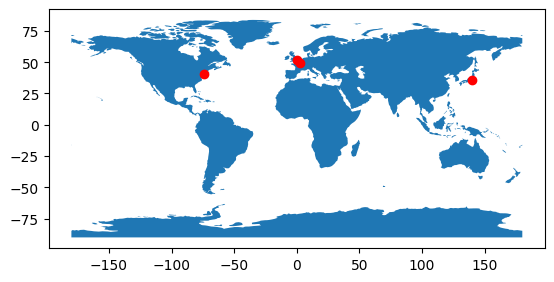

In [30]:
import matplotlib.pyplot as plt 

#plotting the world map and cities
world.plot()
gdf.plot(ax=plt.gca(), color="red")
plt.show()

In [33]:
gdf.crs="EPSG:4326"
gdf.explore()